In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

from world_machine_experiments.shared.save_metrics import load_multiple_metrics, get_values

In [2]:
metrics = load_multiple_metrics("toy1d_experiment1_configuration_test", "toy1d_metrics")

In [4]:
metrics["variation10005006674417811341578641675020555456"]

{'means': {'normal': {'state_decoded_mse': 0.018044056370854378,
   'state_decoded_0.1sdtw': 0.16638486087322235,
   'measurement_mse': 0.010482306592166424,
   'measurement_0.1sdtw': 0.14786048233509064,
   'optimizer_loss': 0.014263181947171688},
  'use_state': {'state_decoded_mse': 0.045310914516448975,
   'state_decoded_0.1sdtw': 0.2275911122560501,
   'measurement_mse': 0.02920614182949066,
   'measurement_0.1sdtw': 0.24208354949951172,
   'optimizer_loss': 0.03725853189826012},
  'prediction': {'state_decoded_mse': 0.1542283147573471,
   'state_decoded_0.1sdtw': 0.7713853716850281,
   'measurement_mse': 0.10825454443693161,
   'measurement_0.1sdtw': 1.1221593618392944,
   'optimizer_loss': 0.13124142587184906},
  'prediction_shallow': {'state_decoded_mse': 0.31511932611465454,
   'state_decoded_0.1sdtw': 2.2360129356384277,
   'measurement_mse': 0.1902468055486679,
   'measurement_0.1sdtw': 2.605436325073242,
   'optimizer_loss': 0.2526830732822418}},
 'stds': {'normal': {'state_

In [5]:

mse = get_values(metrics, ["means","prediction","state_decoded_mse"])
sdtw = get_values(metrics, ["means","prediction","state_decoded_0.1sdtw"])


In [6]:
np.isnan(mse).sum(), np.isnan(sdtw).sum()

(np.int64(29), np.int64(29))

In [7]:
mse_filtered = mse[np.bitwise_not(np.isnan(mse))]
mse_filtered = mse_filtered[mse_filtered<1]

sdtw_filtered = sdtw[np.bitwise_not(np.isnan(sdtw))]
sdtw_filtered = sdtw_filtered[sdtw_filtered<1]


(array([1.667e+03, 1.088e+03, 2.640e+02, 2.100e+01, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.03888832, 0.11188109, 0.18487387, 0.25786664, 0.33085941,
        0.40385219, 0.47684496, 0.54983773, 0.62283051, 0.69582328,
        0.76881605]),
 <BarContainer object of 10 artists>)

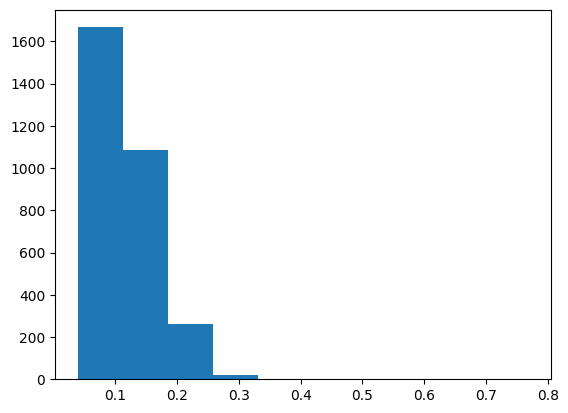

In [8]:
plt.hist(mse_filtered)

(array([142., 417., 446., 444., 378., 307., 226., 199., 124.,  97.]),
 array([0.14090374, 0.22670816, 0.31251259, 0.39831701, 0.48412144,
        0.56992586, 0.65573028, 0.74153471, 0.82733913, 0.91314355,
        0.99894798]),
 <BarContainer object of 10 artists>)

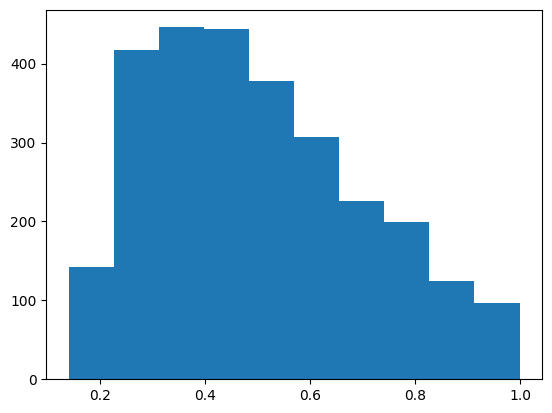

In [9]:
plt.hist(sdtw_filtered)

In [22]:
mask = np.bitwise_not(np.isnan(mse))

In [27]:
index = np.argmin(mse[mask])
index = np.arange(0,len(mse), 1)[mask][index]

index

np.int64(699)

In [29]:
mse[index]

np.float64(0.038888320326805115)

In [12]:
names = list(metrics.keys())

In [28]:
names[index]

'variation169039990650476837415612865146336274566'

In [15]:
train_history = load_multiple_metrics("toy1d_experiment1_configuration_test", "toy1d_train_history")

In [16]:
next(iter(train_history))

'variation10005006674417811341578641675020555456'

In [17]:
optimizer_loss_val = get_values(train_history, ["means", "optimizer_loss_val"])

In [18]:
patience = 6


n_diverge = 0
diverge = []
for patience in range(1, 50):
    patience_diverge = np.zeros(optimizer_loss_val.shape[0], bool)
    for i in range(optimizer_loss_val.shape[0]):
        run_loss = optimizer_loss_val[i]

        best = np.inf
        stuck_count = 0
        for j in range(len(run_loss)):
            if run_loss[j] < best:
                best = run_loss[j]
                stuck_count = 0
            else:
                stuck_count += 1
            
            if stuck_count >= patience:
                patience_diverge[i] = True
                break

    diverge.append(patience_diverge)
diverge = np.array(diverge)
patience = np.array(range(1,50))

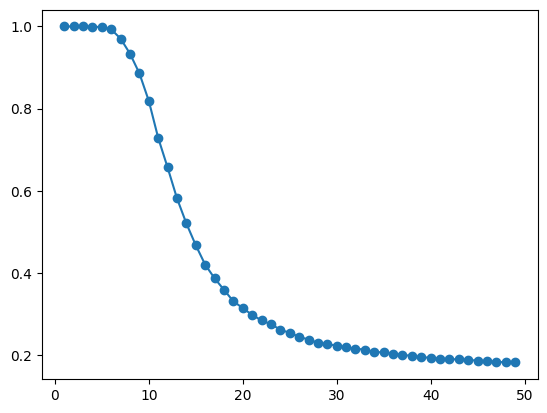

In [19]:
plt.plot(patience, diverge.sum(axis=1)/optimizer_loss_val.shape[0], "o-")

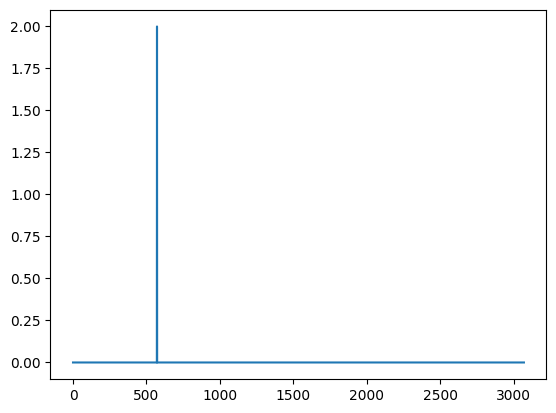

In [20]:
plt.plot(np.isnan(optimizer_loss_val).sum(axis=1))

In [21]:
np.argmax(np.isnan(optimizer_loss_val).sum(axis=1))

np.int64(572)

In [22]:
parameters = load_multiple_metrics("toy1d_experiment1_configuration_test", "parameters")

In [23]:
parameters[names[572]]

{'n_run': 1,
 'base_seed': 42,
 'parameters': {'sequence_length': 1000,
  'n_sequence': 10000,
  'context_size': 200,
  'batch_size': 256,
  'n_epoch': 100,
  'learning_rate': 0.0005,
  'weight_decay': 5e-05,
  'accumulation_steps': 1,
  'state_dimensions': array([0]),
  'optimizer_class': 'torch.optim.adamw.AdamW',
  'device': 'cuda:0',
  'state_control': 'periodic',
  'discover_state': True,
  'sensorial_train_losses': array([2]),
  'state_size': 128,
  'positional_encoder_type': 'alibi',
  'n_attention_head': 4,
  'n_segment': 1,
  'fast_forward': False,
  'stable_state_epochs': 1,
  'check_input_masks': False,
  'state_save_method': 0,
  'mask_sensorial_data': '{"type": "UniformScheduler", "low_value": 0, "high_value": 1, "n_epoch": 100}',
  'short_time_recall': array([2]),
  'recall_stride_past': 1,
  'recall_stride_future': 1,
  'recall_n_past': 0,
  'recall_n_future': 1,
  'block_configuration': array([2, 4]),
  'state_activation': None,
  'state_regularizer': 'mse',
  'train_ms

In [24]:
autoregressive_metrics = load_multiple_metrics("toy1d_experiment1_configuration_test", "toy1d_autoregressive_metrics")

In [25]:
proportion_state_decoded_mse = get_values(autoregressive_metrics, ["means", "proportion", "state_decoded_mse"])
autoregressive_state_decoded_mse = get_values(autoregressive_metrics, ["means", "autoregressive", "state_decoded_mse"])
parallel_state_decoded_mse = get_values(autoregressive_metrics, ["means", "parallel", "state_decoded_mse"])

In [26]:
mask = np.bitwise_and(np.bitwise_not(np.isnan(autoregressive_state_decoded_mse)), np.bitwise_not(np.isnan(parallel_state_decoded_mse)))

proportion_state_decoded_mse_filtered = proportion_state_decoded_mse[mask]
autoregressive_state_decoded_mse_filtered = autoregressive_state_decoded_mse[mask]
parallel_state_decoded_mse_filtered = parallel_state_decoded_mse[mask]

In [27]:
np.max(proportion_state_decoded_mse_filtered)

np.float64(98.22447479372488)

(array([  15.,  854., 1640.,  358.,   98.,   47.,   12.,   10.,   11.,
           4.]),
 array([0.12211373, 0.20696537, 0.291817  , 0.37666863, 0.46152026,
        0.54637189, 0.63122352, 0.71607515, 0.80092679, 0.88577842,
        0.97063005]),
 <BarContainer object of 10 artists>)

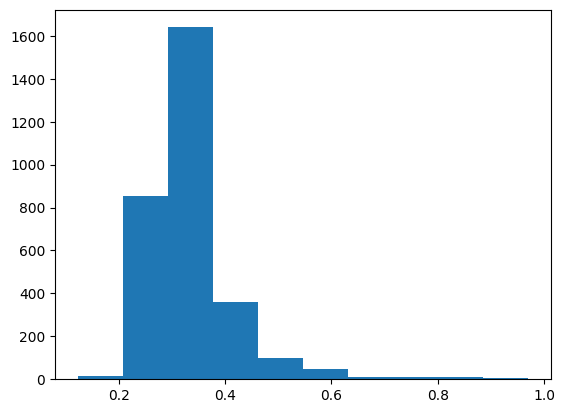

In [28]:
plt.hist(proportion_state_decoded_mse_filtered[proportion_state_decoded_mse_filtered<1])


In [29]:
parallel_state_decoded_mse_filtered

array([0.07414296, 0.03151168, 0.01914103, ..., 0.01994486, 0.01685263,
       0.02306799])

In [30]:
autoregressive_state_decoded_mse_filtered

array([0.01804406, 0.01127584, 0.00731638, ..., 0.00789858, 0.00558528,
       0.00732555])

In [31]:
autoregressive_state_decoded_mse_filtered/parallel_state_decoded_mse_filtered

array([0.24336843, 0.3578304 , 0.38223578, ..., 0.39602104, 0.33141873,
       0.31756364])

In [32]:
proportion_state_decoded_mse_filtered

array([0.24336843, 0.3578304 , 0.38223578, ..., 0.39602104, 0.33141873,
       0.31756364])

Text(0, 0.5, 'Inference')

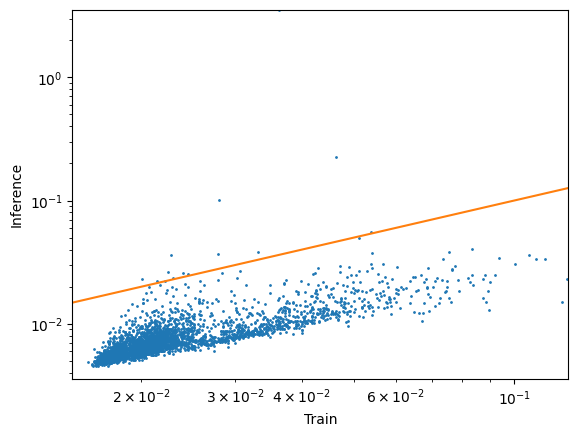

In [33]:
plt.plot(parallel_state_decoded_mse_filtered, autoregressive_state_decoded_mse_filtered, "o", markersize=1)

range_min = np.min([parallel_state_decoded_mse_filtered, autoregressive_state_decoded_mse_filtered])
range_max = np.max([parallel_state_decoded_mse_filtered, autoregressive_state_decoded_mse_filtered])

x = np.arange(range_min, range_max, .1)
plt.plot(x,x)

plt.xlim(np.min(parallel_state_decoded_mse_filtered)-0.001, np.max(parallel_state_decoded_mse_filtered)+0.001)
plt.ylim(np.min(autoregressive_state_decoded_mse_filtered)-0.001, np.max(autoregressive_state_decoded_mse_filtered)+0.001)


plt.yscale("log")
plt.xscale("log")
plt.xlabel("Train")
plt.ylabel("Inference")


In [34]:
spearmanr(parallel_state_decoded_mse_filtered, autoregressive_state_decoded_mse_filtered)

SignificanceResult(statistic=np.float64(0.8108820329609621), pvalue=np.float64(0.0))

In [35]:
np.argmin(np.abs(proportion_state_decoded_mse_filtered-1))

np.int64(2120)

In [36]:
proportion_state_decoded_mse_filtered[2120], autoregressive_state_decoded_mse_filtered[2120]

(np.float64(1.011639173164837), np.float64(0.022369366139173508))

In [37]:
np.min(autoregressive_state_decoded_mse_filtered)

np.float64(0.004552945028990507)

In [38]:
np.array(names)[autoregressive_state_decoded_mse<1][2120]

np.str_('variation310219437139362977249462075056421319265')

In [39]:
parameters["variation310219437139362977249462075056421319265"]

{'n_run': 1,
 'base_seed': 42,
 'parameters': {'sequence_length': 1000,
  'n_sequence': 10000,
  'context_size': 200,
  'batch_size': 256,
  'n_epoch': 100,
  'learning_rate': 0.0005,
  'weight_decay': 5e-05,
  'accumulation_steps': 1,
  'state_dimensions': array([0]),
  'optimizer_class': 'torch.optim.adamw.AdamW',
  'device': 'cuda:0',
  'state_control': 'periodic',
  'discover_state': True,
  'sensorial_train_losses': array([2]),
  'state_size': 128,
  'positional_encoder_type': 'alibi',
  'n_attention_head': 4,
  'n_segment': 2,
  'fast_forward': True,
  'stable_state_epochs': 1,
  'check_input_masks': True,
  'state_save_method': 0,
  'mask_sensorial_data': '{"type": "UniformScheduler", "low_value": 0, "high_value": 1, "n_epoch": 100}',
  'short_time_recall': array([2]),
  'recall_stride_past': 1,
  'recall_stride_future': 1,
  'recall_n_past': 5,
  'recall_n_future': 1,
  'block_configuration': array([2, 2]),
  'state_activation': None,
  'state_regularizer': 'mse',
  'train_mse'

In [40]:
normal = get_values(metrics, ["means","normal","state_decoded_mse"])
use_state = get_values(metrics, ["means","use_state","state_decoded_mse"])
prediction = get_values(metrics, ["means","prediction","state_decoded_mse"])
prediction_shallow = get_values(metrics, ["means","prediction_shallow","state_decoded_mse"])

In [41]:
mask = np.bitwise_and(np.bitwise_not(np.isnan(use_state)), np.bitwise_not(np.isnan(prediction)))
mask = np.bitwise_and(mask, np.bitwise_not(np.isnan(prediction_shallow)))
mask = np.bitwise_and(mask, np.bitwise_not(np.isnan(normal)))

mask = np.bitwise_and(mask, normal < 1)
mask = np.bitwise_and(mask, use_state < 1)
mask = np.bitwise_and(mask, prediction < 1)
mask = np.bitwise_and(mask, prediction_shallow < 1)

In [42]:
mask.sum()/mask.shape[0]

np.float64(0.97265625)

In [43]:
variables = np.array([normal[mask], use_state[mask], prediction[mask], prediction_shallow[mask]])

In [44]:
R = np.corrcoef(variables)

In [45]:
var_names = ["normal", "use_state", "prediction", "prediction_shallow"]

print("X", end="|")
for name in var_names:
    print(name, end="|")

print()
for _ in range(len(var_names)+1):
    print("-", end="|")
print()
for i in range(len(var_names)):
    print(var_names[i], end="|")
    print("|".join(R[i].astype(str)))


X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|1.0|0.9002235092177994|0.612009467006307|0.37002617852576863
use_state|0.9002235092177995|0.9999999999999999|0.6653280668826658|0.5180378295223624
prediction|0.612009467006307|0.6653280668826658|1.0|0.6860886472580014
prediction_shallow|0.3700261785257686|0.5180378295223624|0.6860886472580013|0.9999999999999999


X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|1.0|0.9002235092177994|0.612009467006307|0.37002617852576863
use_state|0.9002235092177995|0.9999999999999999|0.6653280668826658|0.5180378295223624
prediction|0.612009467006307|0.6653280668826658|1.0|0.6860886472580014
prediction_shallow|0.3700261785257686|0.5180378295223624|0.6860886472580013|0.9999999999999999

M = a1*A1 +a2*A2 +b

A1 -> 1 se eu usei técnica X
A2 -> 1 se eu usei técnica Y

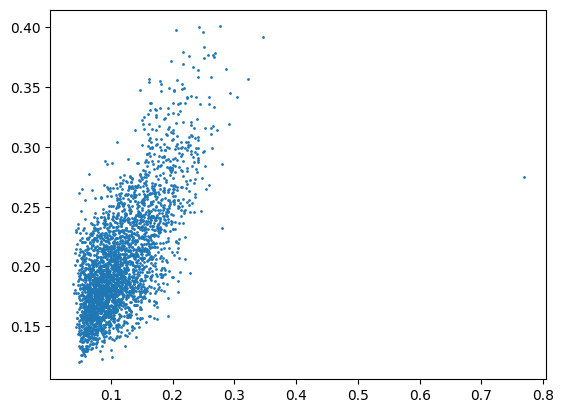

In [46]:
plt.plot(prediction[mask], prediction_shallow[mask], "o", markersize=1)

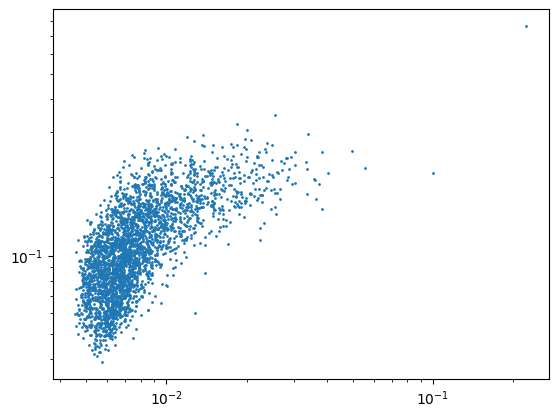

In [47]:
plt.plot(normal[mask], prediction[mask], "o", markersize=1)

plt.yscale("log")
plt.xscale("log")

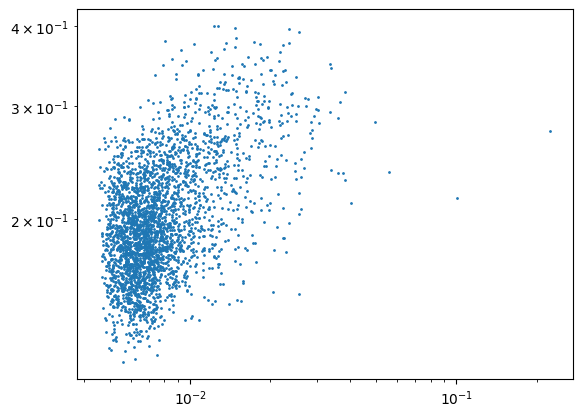

In [48]:
plt.plot(normal[mask], prediction_shallow[mask], "o", markersize=1)

plt.yscale("log")
plt.xscale("log")

In [49]:
sp_stats, p_value = spearmanr(variables, axis=1)

In [50]:
var_names = ["normal", "use_state", "prediction", "prediction_shallow"]

print("X", end="|")
for name in var_names:
    print(name, end="|")

print()
for _ in range(len(var_names)+1):
    print("-", end="|")
print()
for i in range(len(var_names)):
    print(var_names[i], end="|")
    print("|".join(sp_stats[i].astype(str)))


X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|1.0|0.9459043769985176|0.6970615062089526|0.4146975682602099
use_state|0.9459043769985176|1.0|0.692378337041964|0.4520134987838236
prediction|0.6970615062089526|0.692378337041964|1.0|0.622106448109296
prediction_shallow|0.41469756826020987|0.4520134987838235|0.6221064481092959|1.0


**Spearman**
X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|1.0|0.9459043769985176|0.6970615062089526|0.4146975682602099
use_state|0.9459043769985176|1.0|0.692378337041964|0.4520134987838236
prediction|0.6970615062089526|0.692378337041964|1.0|0.622106448109296
prediction_shallow|0.41469756826020987|0.4520134987838235|0.6221064481092959|1.0

**Pearson**
X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|1.0|0.9002235092177994|0.612009467006307|0.37002617852576863
use_state|0.9002235092177995|0.9999999999999999|0.6653280668826658|0.5180378295223624
prediction|0.612009467006307|0.6653280668826658|1.0|0.6860886472580014
prediction_shallow|0.3700261785257686|0.5180378295223624|0.6860886472580013|0.9999999999999999

Existe uma correlação forte entre normal e use_state, o que indica que o modelo performar melhor tem relação direta com lidar melhor com ausência de dados sensoriais. A segunda métrica pode ser desconsiderada.

Em relação ao prediction, essa relação não é tão forte.

Em relação ao prediction_shallow, a relação é a mais fraca. Junto com os valores absolutos dessa métrica (e a análise qualitativa dos samples), parece indicar que a arquitetura ainda não tem a capacidade adequada para realizar esta tarefa.

Na maior parte das variáveis, Spearman>Pearson, o que indica uma relação não-linear entre as variáveis, embora não tanto. Isso inverte com o prediction_shallow, que tem uma relação mais linear com as outras.

In [51]:
p_value

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.53294286e-124],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        2.06172645e-150],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.07488922e-319],
       [1.53294286e-124, 2.06172645e-150, 1.07488922e-319,
        0.00000000e+000]])

In [52]:
var_names = ["normal", "use_state", "prediction", "prediction_shallow"]

print("X", end="|")
for name in var_names:
    print(name, end="|")

print()
for _ in range(len(var_names)+1):
    print("-", end="|")
print()
for i in range(len(var_names)):
    print(var_names[i], end="|")
    print("|".join(p_value[i].astype(str)))


X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|0.0|0.0|0.0|1.5329428628466614e-124
use_state|0.0|0.0|0.0|2.0617264472079606e-150
prediction|0.0|0.0|0.0|1.0749e-319
prediction_shallow|1.5329428628468363e-124|2.0617264472081953e-150|1.0749e-319|0.0


**Spearman pvalue**

X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|0.0|0.0|0.0|1.5329428628466614e-124
use_state|0.0|0.0|0.0|2.0617264472079606e-150
prediction|0.0|0.0|0.0|1.0749e-319
prediction_shallow|1.5329428628468363e-124|2.0617264472081953e-150|1.0749e-319|0.0

In [53]:
from scipy import stats

In [54]:
x = variables[-2]
y = variables[-1]

In [55]:
def statistic(x): # permute only `x`
    return stats.spearmanr(x, y).statistic
res_exact = stats.permutation_test((x,), statistic,
    permutation_type='pairings')
res_asymptotic = stats.spearmanr(x, y)
res_exact.pvalue, res_asymptotic.pvalue

(np.float64(0.0002), np.float64(1.0749e-319))

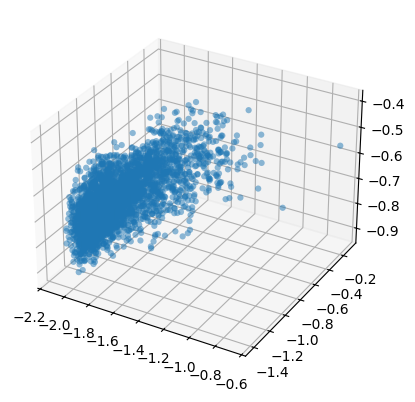

In [56]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(variables[1]), np.log10(variables[2]), np.log10(variables[3]), alpha=.5, edgecolors="none", marker='o')

plt.show()

In [57]:
np.min(prediction_shallow[mask]), np.max(prediction_shallow[mask])

(np.float64(0.11965131759643555), np.float64(0.4008432626724243))

In [58]:
np.min(use_state[mask]), np.max(use_state[mask])

(np.float64(0.007690511643886566), np.float64(0.21146544814109802))

In [67]:
normal = get_values(metrics, ["means","normal","state_decoded_0.1sdtw"])
use_state = get_values(metrics, ["means","use_state","state_decoded_0.1sdtw"])
prediction = get_values(metrics, ["means","prediction","state_decoded_0.1sdtw"])
prediction_shallow = get_values(metrics, ["means","prediction_shallow","state_decoded_0.1sdtw"])

mask = np.bitwise_and(np.bitwise_not(np.isnan(use_state)), np.bitwise_not(np.isnan(prediction)))
mask = np.bitwise_and(mask, np.bitwise_not(np.isnan(prediction_shallow)))
mask = np.bitwise_and(mask, np.bitwise_not(np.isnan(normal)))

mask = np.bitwise_and(mask, normal < 1)
mask = np.bitwise_and(mask, use_state < 1)
mask = np.bitwise_and(mask, prediction < 1)
mask = np.bitwise_and(mask, prediction_shallow < 1)

variables = np.array([normal[mask], use_state[mask], prediction[mask], prediction_shallow[mask]])

R = np.corrcoef(variables)

var_names = ["normal", "use_state", "prediction", "prediction_shallow"]

print("**Pearson**")
print("X", end="|")
for name in var_names:
    print(name, end="|")

print()
for _ in range(len(var_names)+1):
    print("-", end="|")
print()
for i in range(len(var_names)):
    print(var_names[i], end="|")
    print("|".join(R[i].astype(str)))
print()
sp_stats, p_value = spearmanr(variables, axis=1)

print("**Spearman**")
print("X", end="|")
for name in var_names:
    print(name, end="|")

print()
for _ in range(len(var_names)+1):
    print("-", end="|")
print()
for i in range(len(var_names)):
    print(var_names[i], end="|")
    print("|".join(sp_stats[i].astype(str)))
print()

print("**Spearman p-value**")
print("X", end="|")
for name in var_names:
    print(name, end="|")
print()
for _ in range(len(var_names)+1):
    print("-", end="|")
print()
for i in range(len(var_names)):
    print(var_names[i], end="|")
    print("|".join(p_value[i].astype(str)))


**Pearson**
X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|1.0|0.9247739928500579|0.41160419315709124|0.15566879333068032
use_state|0.924773992850058|1.0|0.37103724574206104|0.147481896226651
prediction|0.4116041931570912|0.3710372457420611|1.0|0.4543329225385295
prediction_shallow|0.1556687933306803|0.14748189622665103|0.4543329225385296|1.0

**Spearman**
X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|0.9999999999999998|0.9211257555094949|0.30308962067826783|0.11973930302971209
use_state|0.9211257555094949|0.9999999999999998|0.2798475633713417|0.10847989510704792
prediction|0.30308962067826783|0.2798475633713417|0.9999999999999998|0.44896585914980625
prediction_shallow|0.11973930302971209|0.10847989510704792|0.44896585914980625|0.9999999999999998

**Spearman p-value**
X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|0.0|0.0|1.881126856765399e-26|3.786071032926316e-05
use_state|0.0|0.0|1.2305603703958742e-22|0.000191245940500

**Pearson**
X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|1.0|0.9247739928500579|0.41160419315709124|0.15566879333068032
use_state|0.924773992850058|1.0|0.37103724574206104|0.147481896226651
prediction|0.4116041931570912|0.3710372457420611|1.0|0.4543329225385295
prediction_shallow|0.1556687933306803|0.14748189622665103|0.4543329225385296|1.0

**Spearman**
X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|0.9999999999999998|0.9211257555094949|0.30308962067826783|0.11973930302971209
use_state|0.9211257555094949|0.9999999999999998|0.2798475633713417|0.10847989510704792
prediction|0.30308962067826783|0.2798475633713417|0.9999999999999998|0.44896585914980625
prediction_shallow|0.11973930302971209|0.10847989510704792|0.44896585914980625|0.9999999999999998

**Spearman p-value**
X|normal|use_state|prediction|prediction_shallow|
-|-|-|-|-|
normal|0.0|0.0|1.881126856765399e-26|3.786071032926316e-05
use_state|0.0|0.0|1.2305603703958742e-22|0.00019124594050078073
prediction|1.881126856765399e-26|1.2305603703958742e-22|0.0|1.6909809671672018e-59
prediction_shallow|3.786071032926316e-05|0.00019124594050078073|1.6909809671672018e-59|0.0

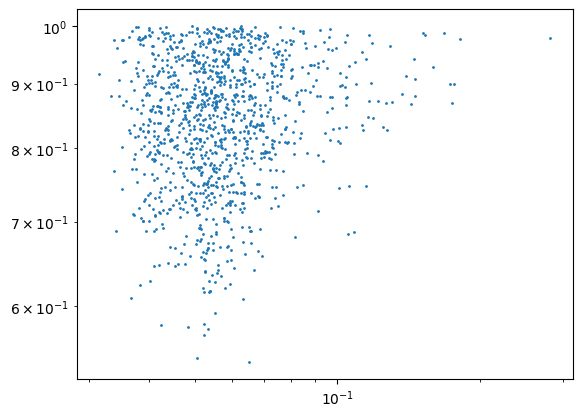

In [70]:
plt.plot(normal[mask], prediction_shallow[mask], "o", markersize=1)

plt.yscale("log")
plt.xscale("log")